In [37]:
using Plots

"""
Solve the 2D heat equation using finite differences and forward Euler time stepping.
Parameters:
    nx, ny: Number of grid points in x and y directions
    Lx, Ly: Physical dimensions of the domain
    α: Thermal diffusivity coefficient
    T: Total simulation time
    dt: Time step size
"""
function solve_heat_2d(nx=50, ny=50, Lx=1.0, Ly=1.0, α=1.0, T=0.5, dt=0.00001)
    # Set up the spatial grid
    dx = Lx / (nx-1)
    dy = Ly / (ny-1)
    x = range(0, Lx, length=nx)
    y = range(0, Ly, length=ny)
    
    # Check numerical stability (CFL condition)
    stability_limit = min(dx^2, dy^2) / (4α)
    if dt > stability_limit
        @warn "Time step too large for stability. Maximum stable dt: $stability_limit"
        dt = stability_limit
    end
    
    # Initialize temperature field with a hot spot in the middle
    # Increase the amplitude to make the initial condition hotter
    u = zeros(nx, ny)
    center_x, center_y = nx ÷ 2, ny ÷ 2
    for i in 1:nx, j in 1:ny
        # Make the initial condition more concentrated and hotter
        u[i,j] = 5.0 * exp(-((i-center_x)^2 + (j-center_y)^2) / 20)
    end
    
    # Time stepping coefficients
    rx = α * dt / dx^2
    ry = α * dt / dy^2
    
    # Main time stepping loop
    t = 0.0
    while t < T
        # Create a copy of u for updating
        u_new = copy(u)
        
        # Update interior points using finite differences
        for i in 2:nx-1, j in 2:ny-1
            u_new[i,j] = u[i,j] + 
                        rx * (u[i+1,j] - 2u[i,j] + u[i-1,j]) +
                        ry * (u[i,j+1] - 2u[i,j] + u[i,j-1])
        end
        
        # Update time and temperature field
        t += dt
        u = u_new
    end
    
    return x, y, u
end

"""
Create an animation of the heat equation solution with improved color scaling.
Parameters:
    nx, ny: Number of grid points in x and y directions
    Lx, Ly: Physical dimensions of the domain
    α: Thermal diffusivity coefficient
    T: Total simulation time
    dt: Time step size
    frame_interval: Number of time steps between animation frames
    color_scale_factor: Factor to adjust color scale (default: 0.3)
"""
function animate_heat_2d(nx=50, ny=50, Lx=1.0, Ly=1.0, α=1.0, T=0.5, dt=0.00001, 
                        frame_interval=100, color_scale_factor=0.003)
    # Calculate total number of time steps, handling floating-point precision
    total_steps = round(Int, T/dt)
    
    x = range(0, Lx, length=nx)
    y = range(0, Ly, length=ny)
    u = zeros(nx, ny)
    
    # Initialize temperature field with higher initial temperature
    center_x, center_y = nx ÷ 2, ny ÷ 2
    for i in 1:nx, j in 1:ny
        u[i,j] = 5.0 * exp(-((i-center_x)^2 + (j-center_y)^2) / 20)
    end
    
    # Store initial maximum temperature and adjust color scale
    u_max = maximum(u)
    color_max = u_max * color_scale_factor  # Adjust color scale to show more detail
    
    # Time stepping coefficients
    dx = Lx / (nx-1)
    dy = Ly / (ny-1)
    rx = α * dt / dx^2
    ry = α * dt / dy^2
    
    # Create animation with proper step handling
    anim = @animate for step in 1:frame_interval:total_steps
        # Update solution for frame_interval steps
        for _ in 1:frame_interval
            u_new = copy(u)
            for i in 2:nx-1, j in 2:ny-1
                u_new[i,j] = u[i,j] + 
                            rx * (u[i+1,j] - 2u[i,j] + u[i-1,j]) +
                            ry * (u[i,j+1] - 2u[i,j] + u[i,j-1])
            end
            u = u_new
        end
        
        # Plot current state with adjusted color limits
        current_time = step * dt
        heatmap(x, y, u', 
                xlabel="x", ylabel="y", 
                title="Temperature at t = $(round(current_time, digits=4))",
                clim=(0, color_max),  # Use adjusted color scale
                color=:thermal,
                aspect_ratio=:equal)
    end
    
    return gif(anim, fps=30)
end

# Example usage:
# To solve without animation:
# x, y, u_final = solve_heat_2d()
# heatmap(x, y, u_final', xlabel="x", ylabel="y", title="Final temperature")
#
# To create animation:
# anim = animate_heat_2d()
# 
# To adjust color scale manually:
# anim = animate_heat_2d(color_scale_factor=0.5)  # Use different factor for color scaling

animate_heat_2d

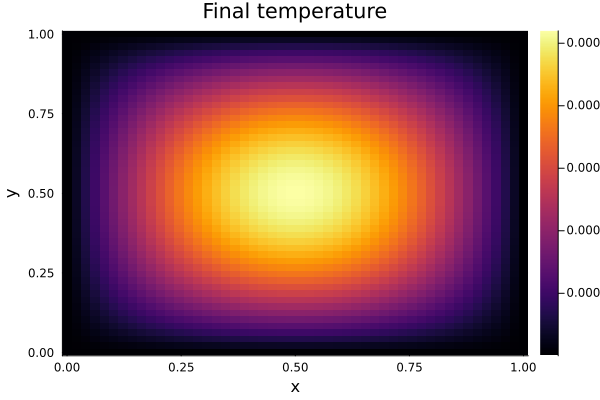

In [38]:
# Example usage:
x, y, u_final = solve_heat_2d()
heatmap(x, y, u_final', xlabel="x", ylabel="y", title="Final temperature")

[ Info: Saved animation to /home/belster/JuliaFiles/PDEs/tmp.gif


Plots.AnimatedGif("/home/belster/JuliaFiles/PDEs/tmp.gif")
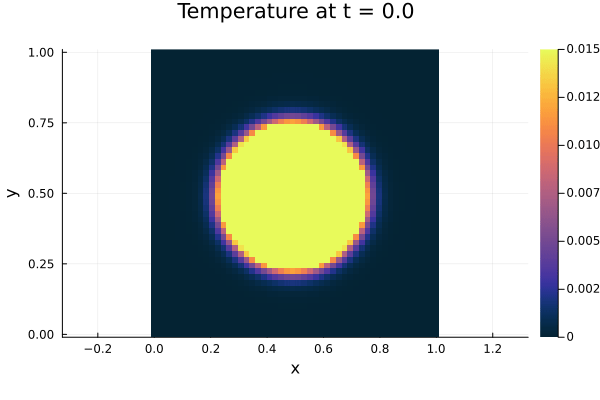

In [39]:
# # Or create an animation:
anim = animate_heat_2d()